In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
from scipy.stats import expon, kde, kstest, geom
from numpy import inf,linspace

In [10]:
data_path2 = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeet.csv"
noofmeetings = pd.read_csv(data_path2)
noofmeetings['time'] = pd.to_datetime(noofmeetings['time'],utc=True)
noofmeetings.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

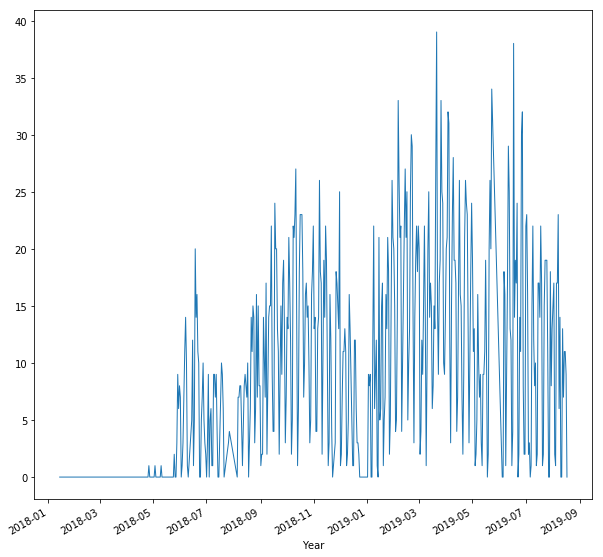

In [11]:
noofmeetings['num_meetings'].plot(figsize=(10,10), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10)

It follows the geometric distribution, It started high and has a long tail that trails off to the right that contains rare cases and we have discrete data. 

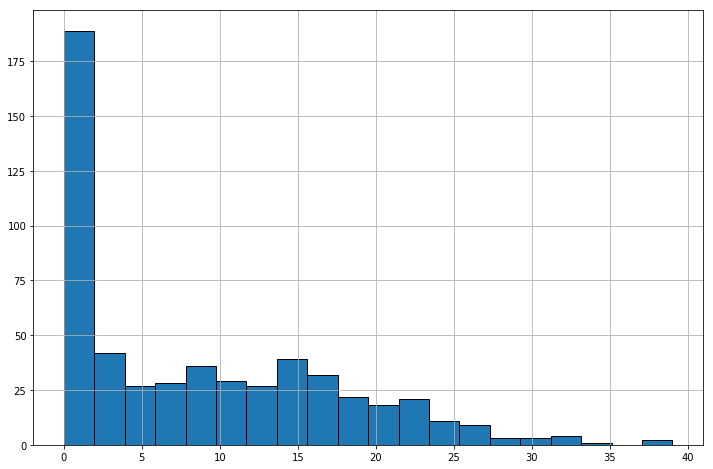

In [12]:
noofmeetings['num_meetings'].hist(bins=20, ec='black', figsize=(12,8))

In [13]:
noofmeetings_var = noofmeetings['num_meetings'].var()
noofmeetings_var

76.28063308257391

In [14]:
nom = noofmeetings['num_meetings']

Kernel Density Estimation - KDE

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


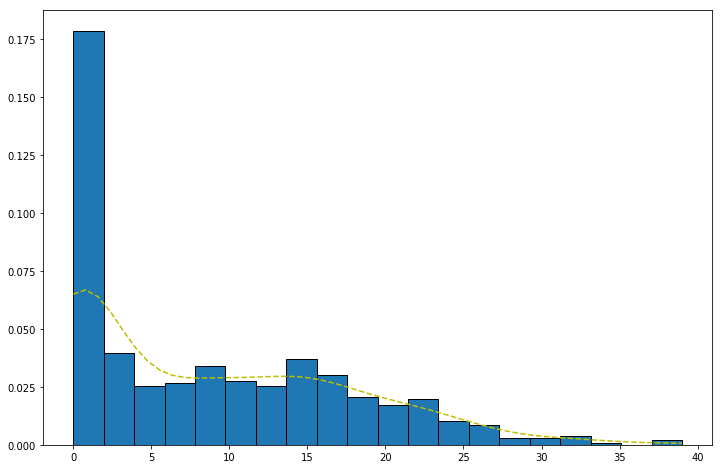

In [15]:
from scipy.stats import kde
nom.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, nom.max())
density = kde.gaussian_kde(nom, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

In [18]:
kstest(nom,lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary]))

KstestResult(statistic=0.18101372667880974, pvalue=4.440892098500626e-16)

In [17]:
kstest(nom,density)

KstestResult(statistic=0.999346321283527, pvalue=0.0)